# Exploratory Data Analysis (EDA)

**Outline:**

1. Reading the file, Summary Statistics

2. Missing Values and Imputation

3. EDA (Plotting, Outliers, Highly correlated features)

------

### Background

Coronary heart disease (CHD) is the most common form of cardiovascular disease and involves reduced blood flow to the heart muscle due to plaque buildup in the arteries. While invasive coronary angiography is the current gold standard for diagnosing CHD, this method carries risks and high costs. Therefore, developing a non-invasive, computer-aided diagnostic tool by combining existing less invasive tests like exercise electrocardiogram, thallium scintigraphy, and coronary calcification imaging could boost their diagnostic accuracy. With further refinement, such a tool could potentially replace angiography as the gold standard for CAD diagnosis, improving patient outcomes and reducing healthcare costs. The diagnostic power of non-invasive testing alone ranges from 35%-75%, but a computer-aided approach that analyzes results from multiple modalities together shows promise for surpassing angiography's diagnostic capabilities without the associated risks and expenses.

The dataset contains 303 observations with 13 features and 1 target variable. The 13 features consist of results from the non-invasive diagnostic tests mentioned previously, as well as other relevant patient data. The target variable represents the outcome of the invasive coronary angiogram, with a value of 0 indicating no coronary artery disease present and values of 1-4 indicating presence of disease at varying levels of severity. Most research utilizing this dataset has focused solely on distinguishing between presence (values 1-4) and absence (value 0) of coronary heart disease.



### Attributes:

The data set was downloaded from the [UCI website](https://archive.ics.uci.edu/dataset/45/heart+disease) .

Attribute Information:

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
13. **thal**: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. **class**: target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel. It will be transformed to:
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

---

In [1]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv("heart+disease/processed.cleveland.data", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
#change column name

df = df.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'], axis=1)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**Checking *'missing values'***:

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [7]:
blank_count = df[df['ca'].isnull()].shape[0]

print(blank_count)

0


The dataset allegedly has no missing values. But if we check the source, it mentions that there are missing values in **ca** and **thal** attributes which is symbolized with '?'.

In [8]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [9]:
print((df == "?").sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64


In [10]:
print((df['ca'] == "?").sum())
print((df['thal'] == "?").sum())

4
2


There are various ways to handle missing data (missing values).

For example:

- If the attribute is **categorical**, replace the missing data with the most frequently occurring value (the mode).
- If the feature is **numerical (continuous)**, replace the missing data with the mean value.
- Or simply remove rows that have missing data if the number is insignificant (The simplest approach).

### Deleting 'missing values'

In [11]:
df_drop = df[(df["ca"] != '?') & (df["thal"] != '?')]

In [12]:
df_drop

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### Missing Values Imputation with The Most Frequent Value using SKLearn

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values="?", strategy='most_frequent')

imputer.fit(df)

df_imputed = imputer.transform(df)

In [14]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


---

## EDA

In [15]:
#change variables types
for col in df_imputed.columns:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').astype(float)

# Check dtypes    
df_imputed.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class       float64
dtype: object

In [16]:
#Change values (1,2,3) into '1' so that class labels values:
#- Value 0: < 50% diameter narrowing --> no disease
#- Value 1: > 50% diameter narrowing --> has disease

df_imputed.loc[df_imputed['class'].isin([1, 2, 3, 4]), 'class'] = 1

df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


### Correlation Matrix

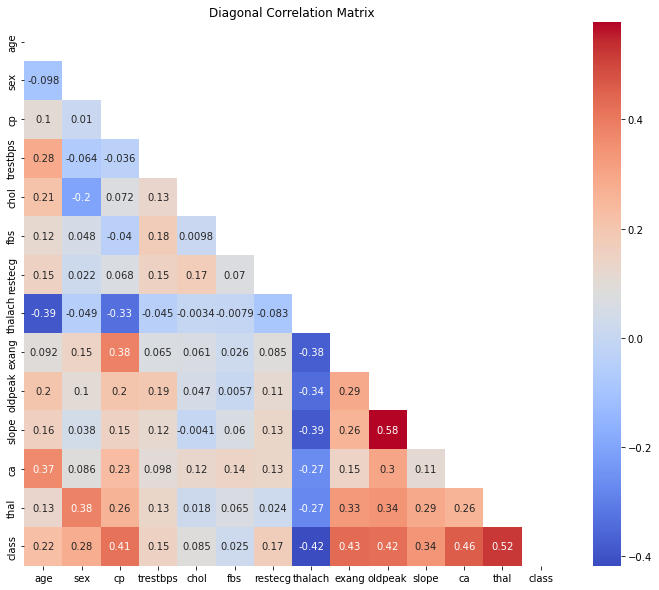

In [17]:
# Calculate the correlation matrix
corr = df_imputed.corr()

# Create a mask for the upper triangle to hide redundant information
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the Matplotlib figure and axis
plt.figure(figsize=(12, 10))  # Set the figure size
ax = sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')

# Customize the plot
plt.title('Diagonal Correlation Matrix')
plt.show()

**Remarks**:

- Highest positively correlated features are **thal**,**ca**,**oldpeak**, **exang**, and **cp** (with correlation coefficients of 0.52, 0.46, 0.42, 0.43, and 0.41)
- Only one feature, **thalach** exhibits a notable negative correlation with the target variable (coefficient of -0.42)
- The feature **fbs** stands out as having minimal to negligible linear correlation with the target variable, as indicated by its correlation coefficient of 0.0.

In [18]:
#mapping categorical variables
df_imputed['class'] = df_imputed['class'].map({1: 'has disease', 0: 'no disease'})
df_imputed['sex'] = df_imputed['sex'].map({0:'Female', 1:'Male'})
df_imputed['cp'] = df_imputed['cp'].map({1:'Typical Angina', 2:'Atypical Angina', 3:'Non-anginal Pain',4:'Asymptomatic'})
df_imputed['fbs'] = df_imputed['fbs'].map({0:'<120 mg/dl', 1:'>120 mg/dl'})
df_imputed['restecg'] = df_imputed['restecg'].map({0: 'Normal', 1:'ST-T wave abnormality', 2:'Left ventricular hypertrophy'})
df_imputed['exang'] = df_imputed['exang'].map({0: 'No', 1:'Yes'})
df_imputed['slope'] = df_imputed['slope'].map({1: 'Uplsoping', 2:'Flat', 3:'Downsloping'})

df_imputed['thal'] = df_imputed['thal'].map({3: 'Normal', 6:'Fixed Defect',7:'Reversible Defect'})

In [19]:
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,Male,Typical Angina,145.0,233.0,>120 mg/dl,Left ventricular hypertrophy,150.0,No,2.3,Downsloping,0.0,Fixed Defect,no disease
1,67.0,Male,Asymptomatic,160.0,286.0,<120 mg/dl,Left ventricular hypertrophy,108.0,Yes,1.5,Flat,3.0,Normal,has disease
2,67.0,Male,Asymptomatic,120.0,229.0,<120 mg/dl,Left ventricular hypertrophy,129.0,Yes,2.6,Flat,2.0,Reversible Defect,has disease
3,37.0,Male,Non-anginal Pain,130.0,250.0,<120 mg/dl,Normal,187.0,No,3.5,Downsloping,0.0,Normal,no disease
4,41.0,Female,Atypical Angina,130.0,204.0,<120 mg/dl,Left ventricular hypertrophy,172.0,No,1.4,Uplsoping,0.0,Normal,no disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Male,Typical Angina,110.0,264.0,<120 mg/dl,Normal,132.0,No,1.2,Flat,0.0,Reversible Defect,has disease
299,68.0,Male,Asymptomatic,144.0,193.0,>120 mg/dl,Normal,141.0,No,3.4,Flat,2.0,Reversible Defect,has disease
300,57.0,Male,Asymptomatic,130.0,131.0,<120 mg/dl,Normal,115.0,Yes,1.2,Flat,1.0,Reversible Defect,has disease
301,57.0,Female,Atypical Angina,130.0,236.0,<120 mg/dl,Left ventricular hypertrophy,174.0,No,0.0,Flat,1.0,Normal,has disease


### Categorical Data Analysis

In [20]:
#styling
custom_palette = ['#63bff0','#de6e56']

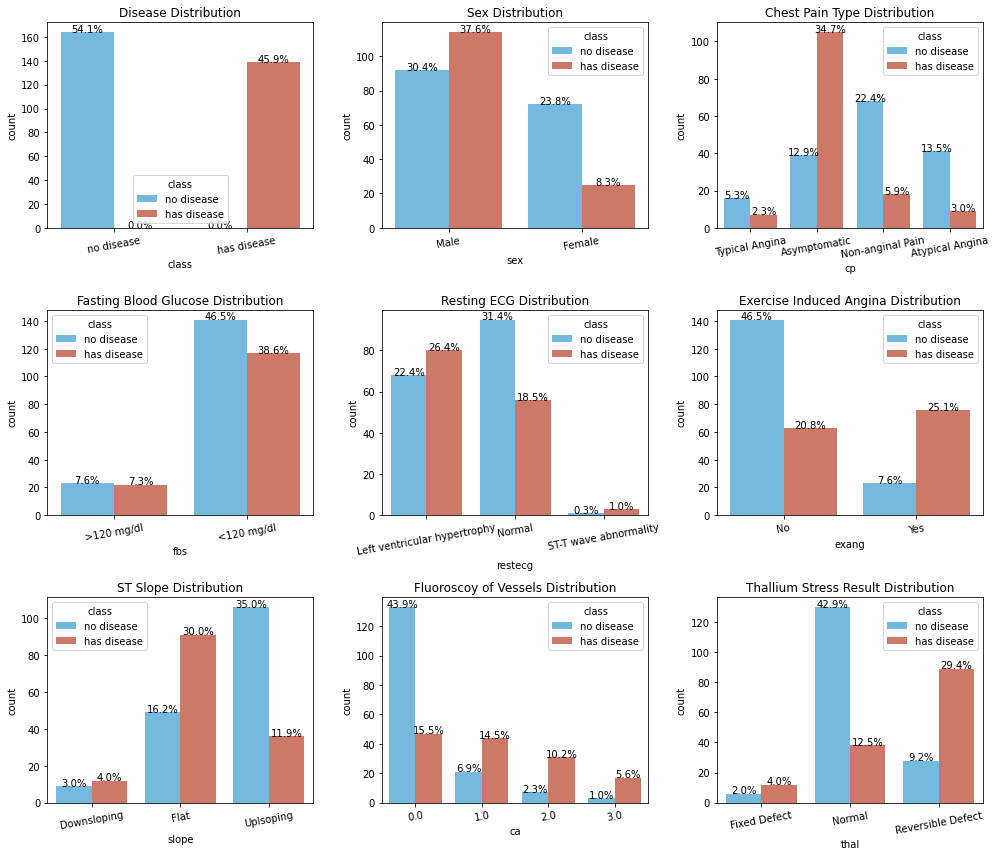

In [21]:
#create categorical graph function
def countplots_grid(df, variables, titles):

    fig, axes = plt.subplots(3, 3, figsize=(14, 12))

    for i, var in enumerate(variables):

        ax = axes[i//3, i%3] 
        sns.countplot(x=var, hue='class', data=df, ax=ax, palette=custom_palette)

        ax.set_title(titles[i])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
        
        total = len(df[var])  # Total number of data points for the current variable

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() + 0.05
            ax.annotate(percentage, (x, y), ha='center')

    plt.tight_layout()
    plt.show()


variables = ['class', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 

titles = ['Disease Distribution', 'Sex Distribution', 'Chest Pain Type Distribution',
          'Fasting Blood Glucose Distribution','Resting ECG Distribution',
          'Exercise Induced Angina Distribution', 'ST Slope Distribution', 'Fluoroscoy of Vessels Distribution',
          'Thallium Stress Result Distribution']

countplots_grid(df_imputed, variables, titles)

**Remarks:**
- Male are more likely to have heart disease
- Most heart disease patients are asymptomatic (-0.41)
- Blood sugar has no relation to the heart disease (0.0)
- Patients with exercised induced angina are 3x more likely to have heart disease (0.41)
- Upslopping ST is associated with normal condition while flat ST is associated with heart disease
- Higher values of coloured major vessels are associated with heart disease (0.46)
- Deceted defects in thallium stress test result is associated with heart disease (0.52)

### Numerical Data Analysis

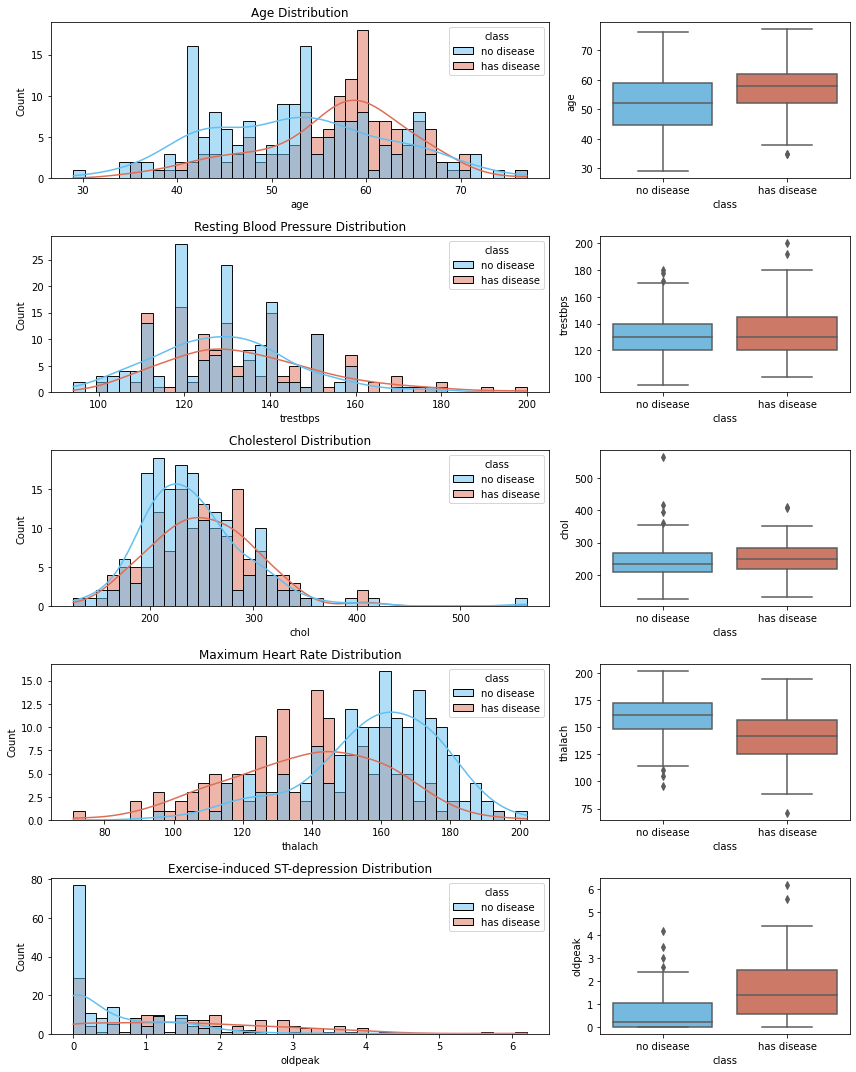

In [22]:
#create categorical graph function
def num_plot_grid(df, attributes, titles, figsize=(12, 15)):

    fig, axes = plt.subplots(len(attributes), 2, figsize=figsize,
                             gridspec_kw={'width_ratios': [2, 1]})
    
    for i, attr in enumerate(attributes):

        sns.histplot(data=df, x=attr, kde=True, hue='class', 
                     bins=40, palette=custom_palette, ax=axes[i,0]) 

        axes[i,0].set_title(titles[i])

        sns.boxplot(data=df, x='class', y=attr,palette=custom_palette, ax=axes[i,1])

    plt.tight_layout()
    plt.show()

attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
titles = ['Age Distribution', 'Resting Blood Pressure Distribution', 
          'Cholesterol Distribution', 'Maximum Heart Rate Distribution', 'Exercise-induced ST-depression Distribution']

num_plot_grid(df_imputed, attributes, titles)

**Remarks:**
- Older patient are more likely to have heart disease
- Lower heart rate is assoicated with heart disease (negative association, corr -0.42)
- Increased ST-depression level is associated with heart disease

<Figure size 432x288 with 0 Axes>

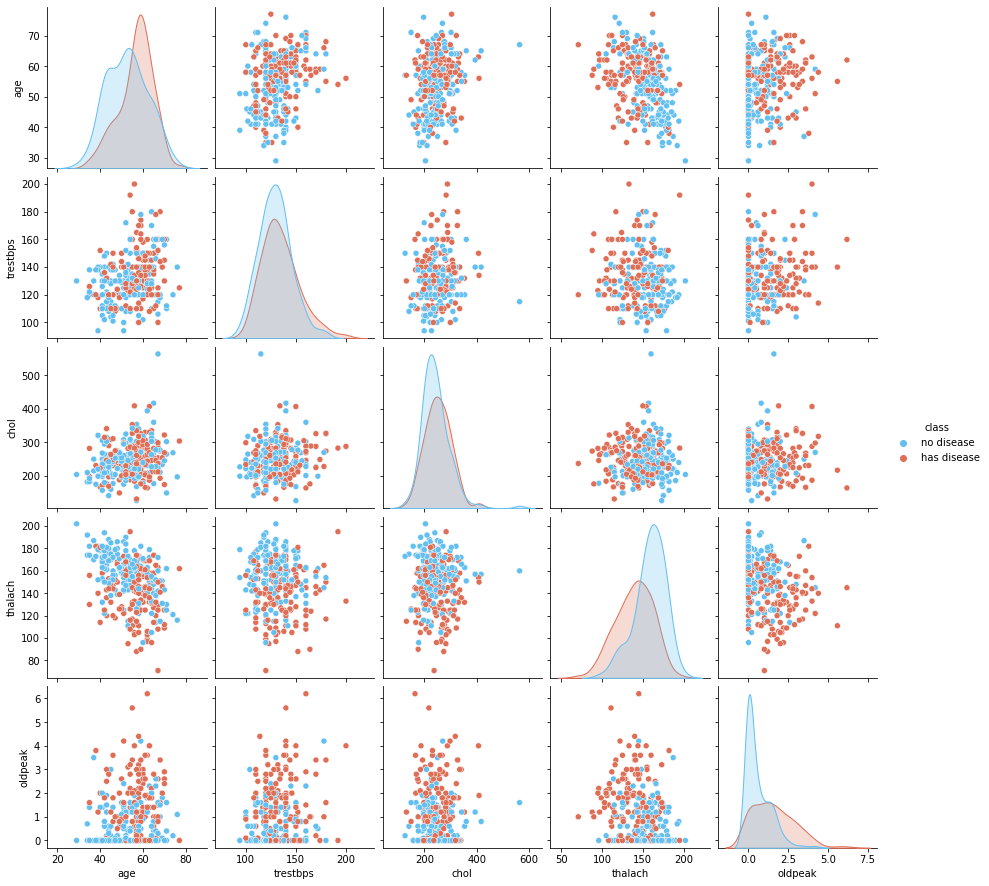

In [23]:
#create pairplot
plt.figure()
sns.pairplot(df_imputed[['age','trestbps','chol','thalach','oldpeak', 'class']], hue='class', palette=custom_palette
           #markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

**Remarks:**
- Some overlaps found in variables in the features, which is 'chol' and 'trestbps'. Both features have similar distribution
- Features 'oldpeak', 'thalach', 'age' have most variation based target variable 'class'